In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from scipy.linalg import pascal
from scipy.stats import norm
import warnings
import scipy
warnings.filterwarnings("ignore")

In [2]:
def delta_plus(z, r, sigma, T, t):
    '''
    for barrier call options
    '''
    tau = T - t 
    return (1 / (sigma * np.sqrt(tau))) * (np.log(z) + (r + pow(sigma, 2) / 2) * tau)

In [3]:
def delta_minus(z, r, sigma, T, t):
    '''
    for barrier call options
    '''
    tau = T - t 
    return (1 / (sigma * np.sqrt(tau))) * (np.log(z) + (r - pow(sigma, 2) / 2) * tau)

In [4]:
def option_lookback_exact(z, r, sigma, T, t):
    tau = T - t
    first_part = (1 + pow(sigma, 2) / (2 * r)) * z * norm.cdf(delta_plus(z, r, sigma, T, t))
    second_part = np.exp(-r * tau) * norm.cdf(-delta_minus(z, r, sigma, T, t))
    third_part = pow(sigma, 2) / (2 * r) * np.exp(-r * tau) * pow(z, 1 - (2 * r) / pow(sigma, 2)) * norm.cdf(-delta_minus(1 / z, r, sigma, T, t))
    return first_part + second_part - third_part - z

In [46]:
# параметры
counts = 101
z = np.linspace(0, 1, counts)
r, sigma = 0.5, 0.1
T, periods = 1, 21
t_grid = np.linspace(0, T, periods)

# цена актива на всем периоде
u = np.zeros((periods, counts))
for t in tqdm(range(periods)):
    t1 = (t - 1) / periods
    t2 = t / periods
    for i in range(counts):
        u[t][i] = option_lookback_exact(z[i], r, sigma, T, t2)

100%|██████████| 21/21 [00:00<00:00, 24.96it/s]


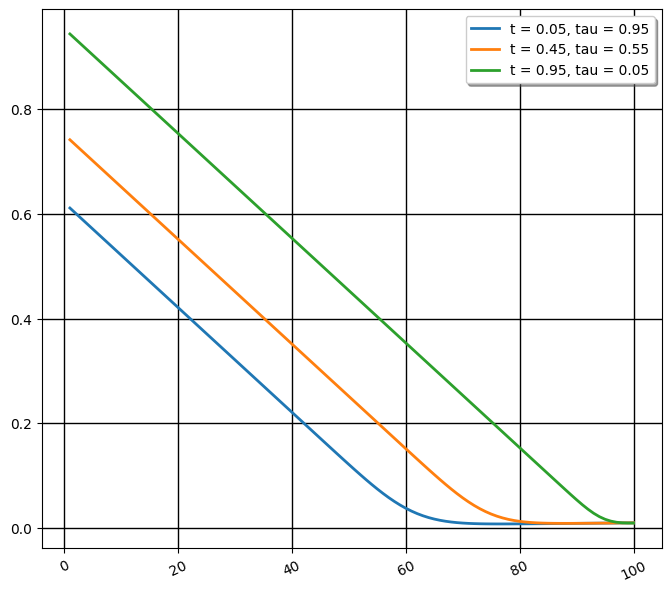

In [50]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()
ax.plot()
t_1 = t_grid[1]
t_9 = t_grid[9]
t_19 = t_grid[19]

ax.plot(u[1], linewidth=2, label='t = 0.05, tau = 0.95')
ax.plot(u[9], linewidth=2, label='t = 0.45, tau = 0.55')
ax.plot(u[19], linewidth=2, label='t = 0.95, tau = 0.05')

ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
plt.legend(loc = 'best', fancybox = True, shadow = True)


#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY

plt.xticks(rotation=25)

fig.set_figwidth(8)
fig.set_figheight(7)

plt.title(f'')
plt.show()